In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#tes gabungin dataset
co2_em_p = pd.read_csv('dataset/co2%.csv')
co2_em = pd.read_csv('dataset/co2total.csv')
gdp = pd.read_csv('dataset/gdp.csv')
e_prod = pd.read_csv('dataset/e_prod.csv')
e_acc = pd.read_csv('dataset/e_access.csv')

In [4]:
e_co2 = pd.merge(co2_em_p, co2_em)
e_co2['CO2_e_electricity'] = (e_co2['Electricity and heat production (%)']/100)* e_co2['Annual CO2 emissions (tonnes )']
e_co2 = e_co2.drop(columns = [
                        'Electricity and heat production (%)', 'Manufacturing industries & construction (%)',
                        'Other sectors (%)', 'Residential buildings & commercial and public services (%)',
                        'Annual CO2 emissions (tonnes )', 'Transport (%)'])
e_co2.tail()#co2 dalam ton

,Entity,Year,CO2_e_electricity
5883,Zimbabwe,2010,4.069355e+06
5884,Zimbabwe,2011,5.124978e+06
5885,Zimbabwe,2012,3.740739e+06
5886,Zimbabwe,2013,6.650995e+06
5887,Zimbabwe,2014,7.053713e+06


In [5]:
e_prod['e_non_ebt'] = (e_prod['Coal (terrawatt-hours)'] + e_prod['Gas (terrawatt-hours)'] +
                      e_prod['Nuclear (terrawatt-hours)'] + e_prod['Oil (terrawatt-hours)'])
e_prod['e_ebt'] = (e_prod['Hydropower (terrawatt-hours)'] + e_prod['Solar (terrawatt-hours)'] +
                  e_prod['Wind (terrawatt-hours)'] + e_prod['Other renewables (terawatt-hours)'])
e_prod = e_prod.drop(columns = ['Coal (terrawatt-hours)', 'Gas (terrawatt-hours)',
                 'Nuclear (terrawatt-hours)', 'Oil (terrawatt-hours)', 'Hydropower (terrawatt-hours)',
                 'Solar (terrawatt-hours)', 'Wind (terrawatt-hours)', 'Other renewables (terawatt-hours)'])
e_prod.tail()#satuan TWh

,Entity,Year,e_non_ebt,e_ebt
5221,World,2014,136554.648017,13934.854121
5222,World,2015,137212.149146,14507.914019
5223,World,2016,138428.383922,15420.049437
5224,World,2017,140309.817458,16399.805790
5225,World,2018,143686.759836,17561.825805


In [8]:
ds1 = pd.merge(e_acc, gdp)
ds2 = pd.merge(e_prod, e_co2)

dataset = pd.merge(ds1, ds2)
dataset.shape

(1935, 8)

In [9]:
dataset.columns = ['country','year','ppl_acc','ppl_no_acc', 'gdp_capita', 'e_non_ebt', 'e_ebt', 'e_co2_em']
dataset.tail()

,country,year,ppl_acc,ppl_no_acc,gdp_capita,e_non_ebt,e_ebt,e_co2_em
1930,World,2010,5791533844,1141335899,12937,129703.614581,11018.679190,1.612553e+10
1931,World,2011,5787556419,1227427549,13587,132678.958529,11576.132383,1.693330e+10
1932,World,2012,6039529788,1060027861,13821,133826.149910,12426.832819,1.727362e+10
1933,World,2013,6120924477,1064213049,14038,135822.429782,13267.500029,1.738380e+10
1934,World,2014,6232831242,1038491579,14261,136554.648017,13934.854121,1.741213e+10


In [11]:
#dataset.to_csv('dataset/EE_data.csv')
#export dataset baru

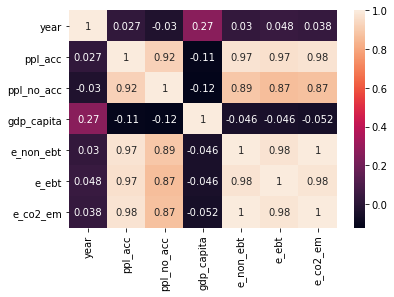

In [22]:
sns.heatmap(dataset.corr(), annot = True)
#makin dekat 1 makin baik

In [15]:
dataset_baru = pd.merge(e_acc, ds2)
dataset_baru.tail()

,Entity,Year,People with access to electricity (people with electricity),People without access to electricity (people without electricity access),e_non_ebt,e_ebt,CO2_e_electricity
1933,World,2010,5791533844,1141335899,129703.614581,11018.679190,1.612553e+10
1934,World,2011,5787556419,1227427549,132678.958529,11576.132383,1.693330e+10
1935,World,2012,6039529788,1060027861,133826.149910,12426.832819,1.727362e+10
1936,World,2013,6120924477,1064213049,135822.429782,13267.500029,1.738380e+10
1937,World,2014,6232831242,1038491579,136554.648017,13934.854121,1.741213e+10


In [18]:
dataset_baru.columns = ['country','year','ppl_acc','ppl_no_acc', 'e_non_ebt', 'e_ebt', 'e_co2_em']
dataset_baru = dataset_baru.drop(columns = ['year'])
dataset_baru.tail()

,country,ppl_acc,ppl_no_acc,e_non_ebt,e_ebt,e_co2_em
1933,World,5791533844,1141335899,129703.614581,11018.679190,1.612553e+10
1934,World,5787556419,1227427549,132678.958529,11576.132383,1.693330e+10
1935,World,6039529788,1060027861,133826.149910,12426.832819,1.727362e+10
1936,World,6120924477,1064213049,135822.429782,13267.500029,1.738380e+10
1937,World,6232831242,1038491579,136554.648017,13934.854121,1.741213e+10


In [24]:
dataset_baru.shape
#dataset_baru.to_csv('dataset/EE_data_baru.csv')
#export lagi setelah drop column yang korelasinya buruk

(1938, 6)

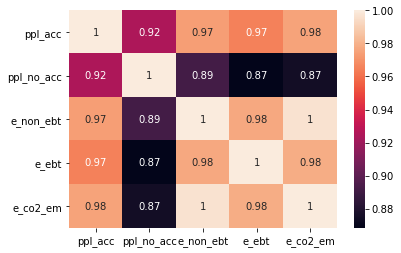

In [23]:
sns.heatmap(dataset_baru.corr(), annot = True)